In [2]:
#This Code is used to analyse your Spotify Dataset. 
#This can be replaced with your own spotify dataset. 

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## As we have multiple datasets, combining them into a single one and working on it!

In [21]:
df1 =pd.read_csv("C:\Artificial Intelligence\ML---Projects\Spotify Data Analysis\s2.csv")
df2 =pd.read_csv("C:\Artificial Intelligence\ML---Projects\Spotify Data Analysis\s1.csv")
df3 =pd.read_csv("C:\Artificial Intelligence\ML---Projects\Spotify Data Analysis\s3.csv")
df4 =pd.read_csv("C:\Artificial Intelligence\ML---Projects\Spotify Data Analysis\s4.csv")
df5 =pd.read_csv("C:\Artificial Intelligence\ML---Projects\Spotify Data Analysis\s5.csv")
result_df = pd.concat([df2,df1,df3,df4,df5])

In [22]:
#Printing the first 5 rows data in the super dataset (result)df
result_df.head()

,endTime,artistName,trackName,msPlayed
0,2022-09-17 15:28,Devi Sri Prasad,Daakko Daakko Meka,248344
1,2022-09-18 07:54,Shreya Ghoshal,Preminche Premava,354368
2,2022-09-18 07:59,Swarnalatha,Erruvaaka,2512
3,2022-09-18 07:59,Hariharan,Kuchi Kuchi Konamma - Bombay / Soundtrack Version,306293
4,2022-09-18 07:59,Sonu Nigam,Raave Na Cheliya,12277


In [23]:
#Printing the basic information about the dataset! 
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40884 entries, 0 to 883
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     40884 non-null  object
 1   artistName  40884 non-null  object
 2   trackName   40884 non-null  object
 3   msPlayed    40884 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


### Here, there are 40884 entries in the dataset, and also in each individual column there are same amount of entries. It means there is no data missing here!

In [24]:
#Printing the columns names of the dataset!
result_df.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [25]:
#Describe method provides the means and other stats of the dataset and the columns of it!
result_df.describe()

,msPlayed
count,4.088400e+04
mean,9.676414e+04
std,1.682266e+05
min,0.000000e+00
25%,1.033000e+03
50%,1.061000e+04
75%,1.957090e+05
max,9.218150e+06


In [26]:
#Let's us again check if there are any null values are present in the dataset or not using pre defined function --
print(result_df.isnull().sum())


endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64


### Hence, as we've assumed before there are no columns which are having null values

In [27]:
#Let us try to fiund the actual size of the dataset!
result_df.shape

(40884, 4)

- There are 40884 rows and 4 columns in the whole dataset! 

In [28]:
# Now to know the columns names, let us print 
result_df.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

# Let us try to visualize this data using Seaborn and Matplotlib libraries!

In [29]:
result_df['endTime'] = pd.to_datetime(result_df['endTime'])


#  Top Artists by play count


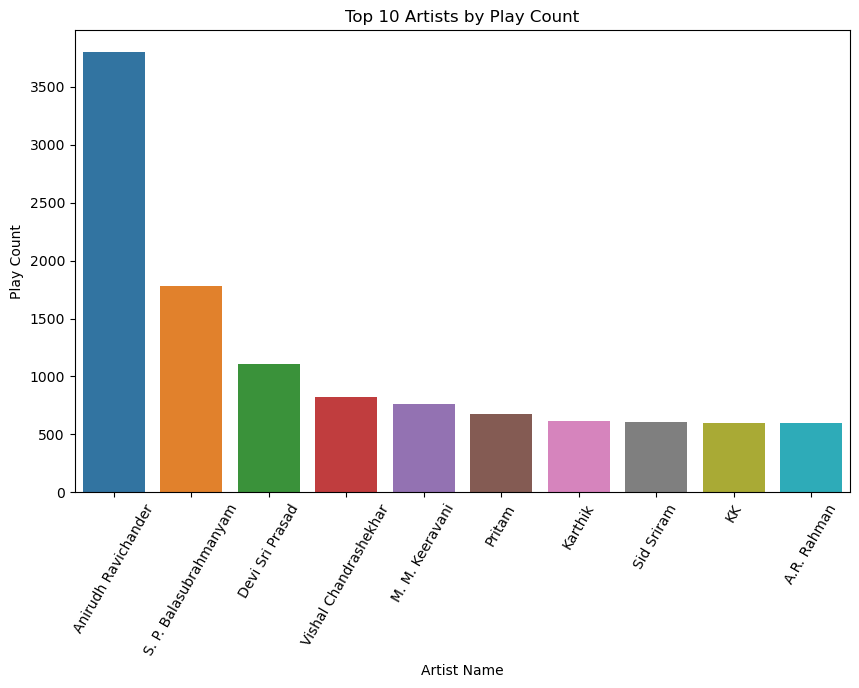

In [34]:
top_artists = result_df['artistName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=60)
plt.xlabel('Artist Name')
plt.ylabel('Play Count')
plt.title('Top 10 Artists by Play Count')
plt.show()

# Top Tracks by play count


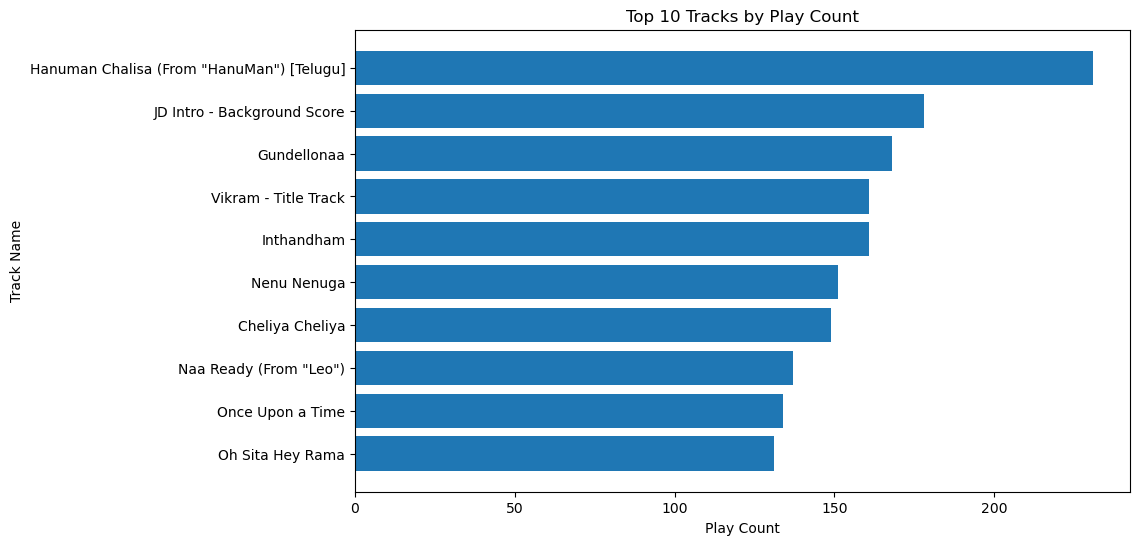

In [52]:
top_tracks = result_df['trackName'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_tracks.index, top_tracks.values)
plt.xlabel('Play Count')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Play Count')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top track at the top
plt.show()


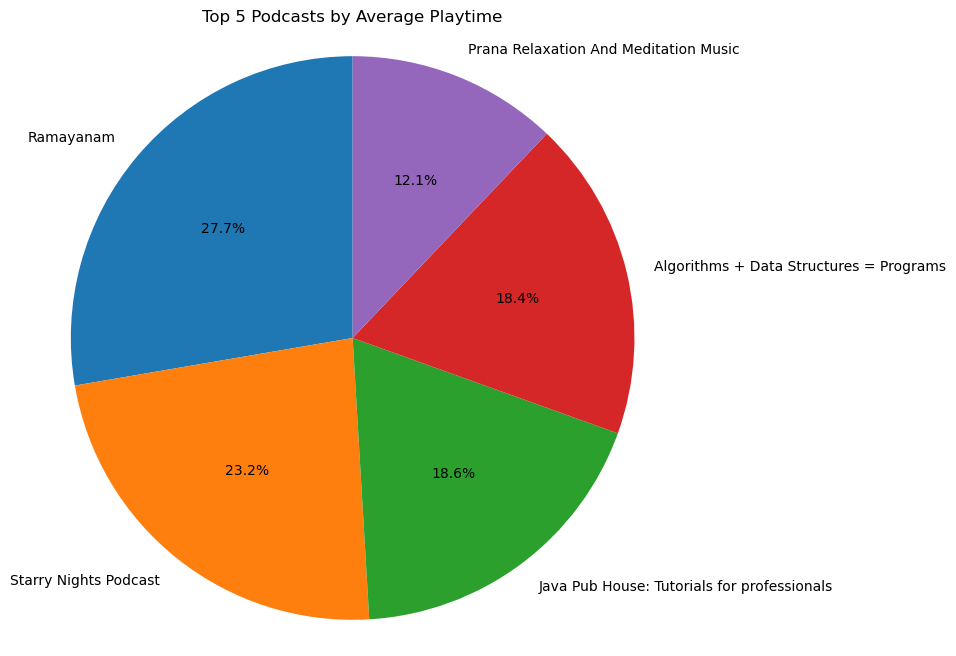

In [50]:
avg_playtime_by_artist = result_df.groupby('artistName')['msPlayed'].mean().sort_values(ascending=False).head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_playtime_by_artist, labels=avg_playtime_by_artist.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 5 Podcasts by Average Playtime')
plt.show()

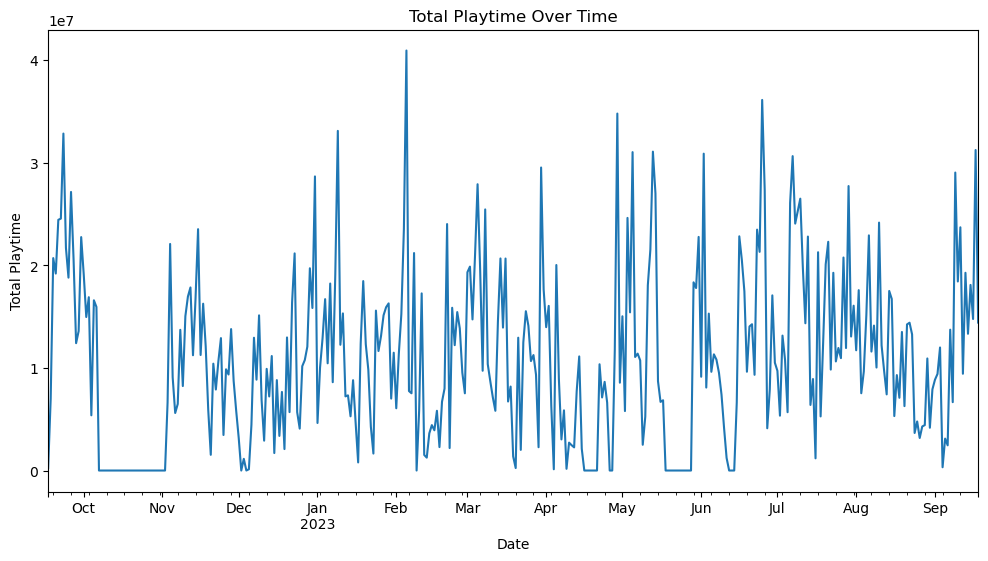

In [55]:
playtime_over_time = result_df.resample('D')['msPlayed'].sum()
plt.figure(figsize=(12, 6))
playtime_over_time.plot()
plt.xlabel('Date')
plt.ylabel('Total Playtime')
plt.title('Total Playtime Over Time')
plt.show()


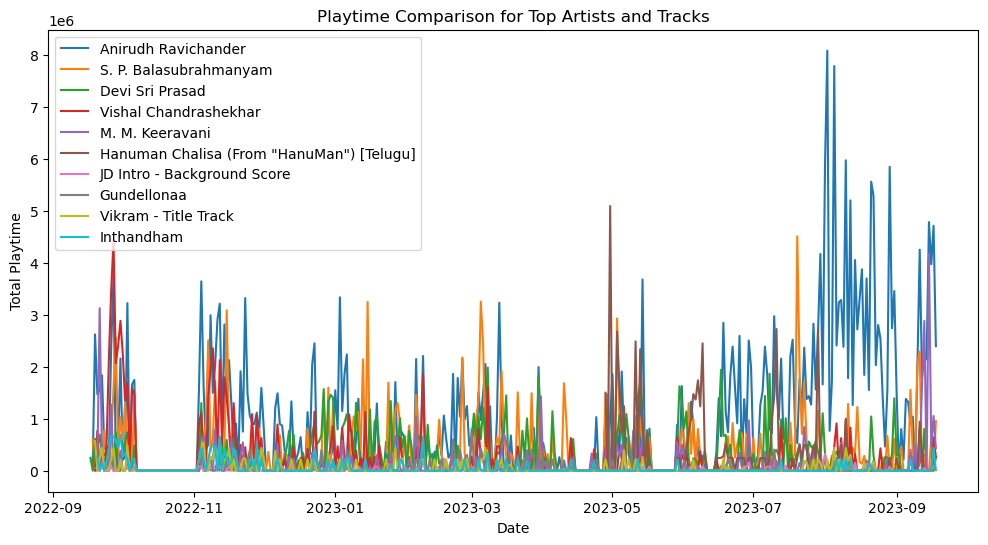

In [59]:
top_artists = result_df['artistName'].value_counts().head(5).index
top_tracks = result_df['trackName'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
for artist in top_artists:
    plt.plot(result_df[result_df['artistName'] == artist].resample('D')['msPlayed'].sum(), label=artist)
for track in top_tracks:
    plt.plot(result_df[result_df['trackName'] == track].resample('D')['msPlayed'].sum(), label=track)

plt.xlabel('Date')
plt.ylabel('Total Playtime')
plt.title('Playtime Comparison for Top Artists and Tracks')
plt.legend()
plt.show()


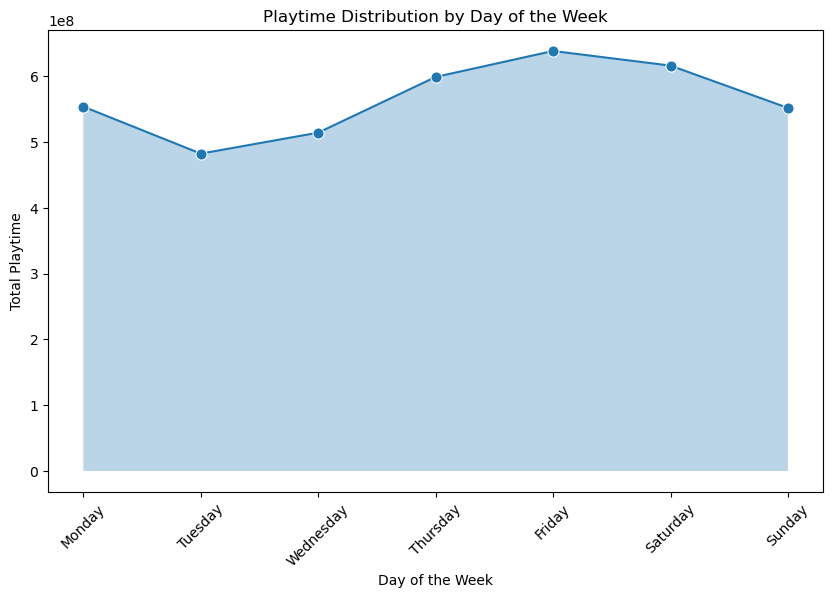

In [62]:
playtime_by_day = result_df.groupby('day_of_week')['msPlayed'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a line plot with filled areas
plt.figure(figsize=(10, 6))
sns.lineplot(x=playtime_by_day.index, y=playtime_by_day.values, marker="o", markersize=8)
plt.fill_between(playtime_by_day.index, playtime_by_day.values, alpha=0.3)
plt.xlabel('Day of the Week')
plt.ylabel('Total Playtime')
plt.title('Playtime Distribution by Day of the Week')
plt.xticks(rotation=45)
plt.show()